In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
gold_data = pd.read_csv('gold-fixed.csv')

In [3]:
gold_data.head()


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2000-02-15,http://www.marketwatch.com/story/thom-calandra...,gold is poised for greatness,1,0,0,0,1,0,positive
1,2000-02-17,http://www.marketwatch.com/story/gold-falls-on...,gold falls on technical pull back,0,0,1,0,1,0,negative
2,2000-03-24,http://www.marketwatch.com/story/gold-quiet-on...,gold quiet on lack of market news,0,1,0,0,1,0,neutral
3,2000-04-27,http://www.marketwatch.com/story/gold-futures-...,gold futures steady as index climbs,0,1,0,0,1,0,neutral
4,2000-05-04,http://www.marketwatch.com/story/gold-and-silv...,gold and silver stocks in relief rally,1,0,0,1,1,0,positive


In [4]:
gold_data = gold_data.drop('URL', axis=1)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

In [6]:
features = gold_data['News']
target = gold_data['Price Sentiment']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [9]:
vectorizer = CountVectorizer()

In [10]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [11]:
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
rf_model = RandomForestClassifier()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the text data
X = vectorizer.fit_transform(features)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets (80-20 split)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

max_depth_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
min_samples_split_values = [2]
min_samples_leaf_values = [1]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Initialize and train the Random Forest model with the current hyperparameters
            rf_model = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, n_estimators=100)
            
            # Concatenate training and validation data
            X_train_valid = np.concatenate((X_train.toarray(), X_valid.toarray()), axis=0)
            y_train_valid = np.concatenate((y_train, y_valid), axis=0)
            
            # Train the model on concatenated data
            rf_model.fit(X_train_valid, y_train_valid)
            
            # Calculate accuracy on validation set
            y_valid_pred = rf_model.predict(X_valid)
            valid_accuracy = accuracy_score(y_valid, y_valid_pred)
            
            # Calculate accuracy on training set
            y_train_pred = rf_model.predict(X_train)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            
            # Append accuracies to the lists
            train_accuracies.append(train_accuracy)
            test_accuracies.append(valid_accuracy)
            
            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}")
            print("Training Accuracy:", train_accuracy)
            print("Validation Accuracy:", valid_accuracy)
            print()


Max Depth: 2, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.43309806277218804
Validation Accuracy: 0.44144144144144143

Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.45922811232917854
Validation Accuracy: 0.4678678678678679

Max Depth: 4, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.5892776693197177
Validation Accuracy: 0.5915915915915916

Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.645442258597387
Validation Accuracy: 0.6522522522522523

Max Depth: 6, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.6329779246133053
Validation Accuracy: 0.63003003003003

Max Depth: 7, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.670220753866947
Validation Accuracy: 0.6744744744744745

Max Depth: 8, Min Samples Split: 2, Min Samples Leaf: 1
Training Accuracy: 0.6981528758071782
Validation Accuracy: 0.7099099099099099

Max Depth: 9, Min Samples Split: 2, Min Samples Leaf: 1


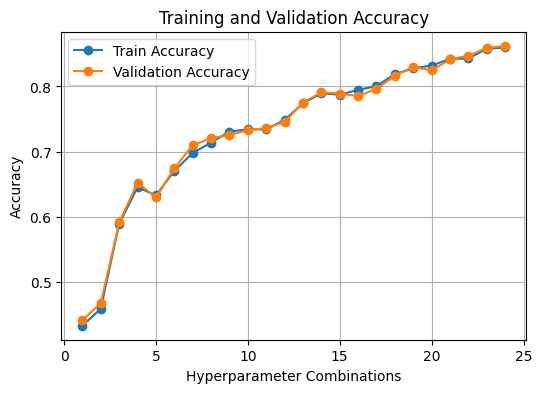

In [71]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, len(train_accuracies) + 1)
# Plot the train_accuracies and test_accuracies

plt.figure(figsize=(6, 4))
plt.plot(epochs, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(epochs, test_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("training_validation_accuracy.svg")  # Save the plot as an image file
plt.show()


In [67]:
from sklearn.metrics import classification_report

# Set the hyperparameters to the last values in the lists
max_depth = max_depth_values[-1]
min_samples_split = 2
min_samples_leaf = 1

print(f"Classification Report for Model with Last Hyperparameters:")
print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}\n")

rf_model.set_params(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, n_estimators=100)

rf_model.fit(X_train_valid, y_train_valid)

y_valid_pred = rf_model.predict(X_valid)

print(classification_report(y_valid, y_valid_pred))


Classification Report for Model with Last Hyperparameters:
Max Depth: 25, Min Samples Split: 2, Min Samples Leaf: 1

              precision    recall  f1-score   support

    negative       0.99      0.94      0.96       600
     neutral       1.00      0.27      0.43        62
        none       0.98      0.51      0.67       302
    positive       0.76      1.00      0.86       701

    accuracy                           0.86      1665
   macro avg       0.93      0.68      0.73      1665
weighted avg       0.89      0.86      0.85      1665



In [88]:

print("Accuracy:", accuracy_score(y_valid, y_valid_pred))


Accuracy: 0.8606606606606607


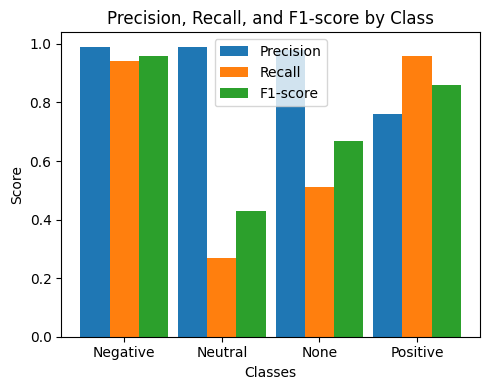

In [2]:
import matplotlib.pyplot as plt
import numpy as np

precision = [0.99, 0.99, 0.98, 0.76]
recall = [0.94, 0.27, 0.51, 0.96]
f1_score = [0.96, 0.43, 0.67, 0.86]

classes = ['Negative', 'Neutral', 'None', 'Positive']

bar_width = 0.3

index = np.arange(len(classes))

plt.figure(figsize=(5, 4))  # Adjust figure size as needed
plt.bar(index - bar_width, precision, bar_width, label='Precision')
plt.bar(index, recall, bar_width, label='Recall')
plt.bar(index + bar_width, f1_score, bar_width, label='F1-score')

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score by Class')
plt.xticks(index, classes)  # Use xticks to label classes on x-axis
plt.legend()

plt.tight_layout()
plt.savefig("figure.svg")
plt.show()
